In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/MyDrive/Ml_LAB/housing.csv")

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
len(data.total_bedrooms.unique())

1924

In [ ]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


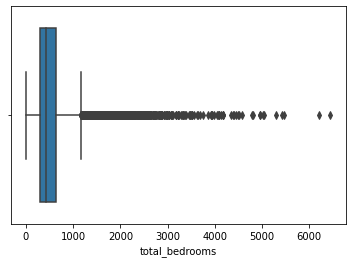

In [ ]:
sns.boxplot(data.total_bedrooms)

In [ ]:
data.total_bedrooms.fillna(value = data.total_bedrooms.median() , inplace = True)

In [ ]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [ ]:
label_encoder = LabelEncoder()
data.ocean_proximity = label_encoder.fit_transform(data.ocean_proximity)

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [ ]:
data.ocean_proximity.unique()

array([3, 0, 1, 4, 2])

In [ ]:
X = data.drop(columns = ["median_house_value"])
Y = data.median_house_value

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1 , 1))

In [ ]:
X.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
Y.std(axis = 0)

array([1.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state = 42)

In [ ]:
X_train.shape

(15480, 9)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
regressor = MLPRegressor(hidden_layer_sizes = (150 , 200 , 75) , max_iter = 1000 , verbose = True)

In [ ]:
regressor.fit(X_train , Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.18238868
Iteration 2, loss = 0.13594023
Iteration 3, loss = 0.12654596
Iteration 4, loss = 0.12020276
Iteration 5, loss = 0.11679631
Iteration 6, loss = 0.11281656
Iteration 7, loss = 0.10997500
Iteration 8, loss = 0.10913381
Iteration 9, loss = 0.10872474
Iteration 10, loss = 0.10587275
Iteration 11, loss = 0.10572443
Iteration 12, loss = 0.10221863
Iteration 13, loss = 0.10061109
Iteration 14, loss = 0.10009543
Iteration 15, loss = 0.09922996
Iteration 16, loss = 0.09886059
Iteration 17, loss = 0.09771561
Iteration 18, loss = 0.09741352
Iteration 19, loss = 0.09588110
Iteration 20, loss = 0.09462952
Iteration 21, loss = 0.09251278
Iteration 22, loss = 0.09370110
Iteration 23, loss = 0.09157217
Iteration 24, loss = 0.09192059
Iteration 25, loss = 0.09334600
Iteration 26, loss = 0.09013314
Iteration 27, loss = 0.08906302
Iteration 28, loss = 0.08809158
Iteration 29, loss = 0.08896035
Iteration 30, loss = 0.08903085
Iteration 31, loss = 0.08764893
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(150, 200, 75), max_iter=1000, verbose=True)

In [ ]:
regressor.score(X_test , Y_test)

0.7324867743645843

In [ ]:
regressor.score(X_train , Y_train)

0.9704703557513003